In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df=pd.read_csv('gdrive/My Drive/mat1856/bond.csv') #customize this address

In [6]:
print(df[df.columns[0]])

0    CANADACD-BONDS 2018(24)
1    CANADACD-BONDS 2019(24)
2    CANADACD-BONDS 2019(25)
3    CANADACD-BONDS 2020(25)
4    CANADACD-BONDS 2020(26)
5    CANADACD-BONDS 2021(26)
6    CANADACD-BONDS 2021(27)
7    CANADACD-BONDS 2022(27)
8    CANADACD-BONDS 2022(28)
9    CANADACD-BONDS 2023(28)
Name: Name, dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.05416853 0.0470036  0.04452916 0.04170203 0.03901385 0.03755319
 0.03680533 0.03602772 0.03539843 0.03483055]


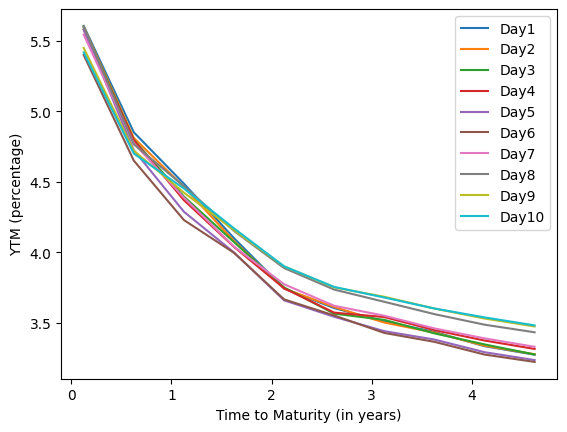

In [39]:
#yield to maturity curve
j=0
for j in range(10):
  yield_curve = np.zeros(10)
  for i in range(10):
    if i == 0:
      yield_curve[i]= np.log(df[df.columns[6+j]][i]/(100+df[df.columns[1]][i]/2))/(df[df.columns[5]][i]*(-1)+0.00274*j)
    else:
      known_values = 0
      for k in range(i):
        known_values+=np.exp(-1*yield_curve[k]*df[df.columns[5]][k])* df[df.columns[1]][i]/2
      unknown_value = df[df.columns[6+j]][i]-known_values
      yield_curve[i]= np.log(unknown_value/(100+df[df.columns[1]][i]/2))/df[df.columns[5]][i]*(-1)
  plt.plot(df[df.columns[5]],100*yield_curve, label = 'Day{}'.format(j+1))
  plt.legend()
plt.xlabel("Time to Maturity (in years)")
plt.ylabel("YTM (percentage)")
from google.colab import files
plt.savefig("ytm.pdf")
files.download("ytm.pdf")
print(yield_curve)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.0556625  0.04738355 0.04426156 0.04085148 0.03766672 0.03577368
 0.03459517 0.03346593 0.03248428 0.03153316]


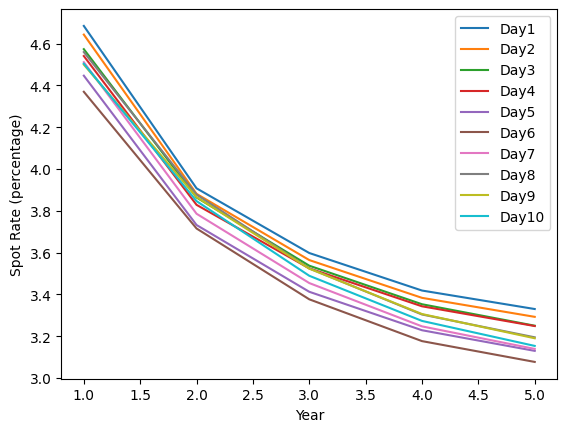

In [44]:
#spot rate curve
j=0
for j in range(10):
  spot_curve = np.zeros(10)
  for i in range(10):
    if i == 0:
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/df[df.columns[6+j]][i])**(1/(df[df.columns[5]][i]-0.00274*j))-1
    else:
      known_values = 0
      for k in range(i):
        known_values+= 0.5*df[df.columns[1]][i]/(1+spot_curve[k])**(df[df.columns[5]][k]-0.00274*j)
      unknown_value = df[df.columns[6+j]][i]-known_values
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/unknown_value)**(1/(df[df.columns[5]][i])-0.00274*j)-1
  plt.plot([1,2,3,4,5],np.interp([1,2,3,4,5], df[df.columns[5]],100*spot_curve), label = 'Day{}'.format(j+1))
  plt.legend()
  #plt.plot(df[df.columns[5]],spot_curve)
plt.xlabel("Year")
plt.ylabel("Spot Rate (percentage)")
from google.colab import files
plt.savefig("spot.pdf")
files.download("spot.pdf")
print(spot_curve)

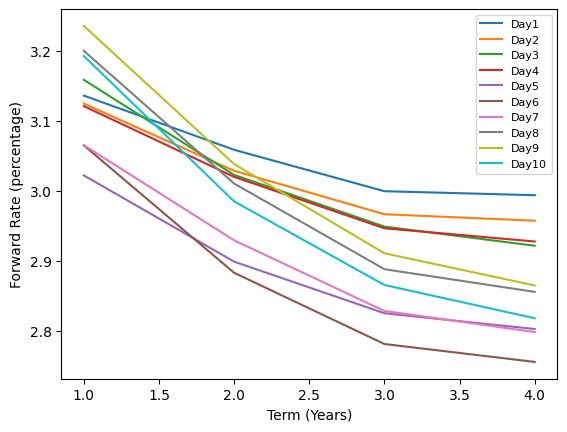

In [70]:
#forward rate curve
j=0
for j in range(10):
  spot_curve = np.zeros(10)
  for i in range(10):
    if i == 0:
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/df[df.columns[6+j]][i])**(1/(df[df.columns[5]][i]-0.00274*j))-1
    else:
      known_values = 0
      for k in range(i):
        known_values+= 0.5*df[df.columns[1]][i]/(1+spot_curve[k])**(df[df.columns[5]][k]-0.00274*j)
      unknown_value = df[df.columns[6+j]][i]-known_values
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/unknown_value)**(1/(df[df.columns[5]][i])-0.00274*j)-1
  spot_curve_2 = np.interp([1,2,3,4,5], df[df.columns[5]],spot_curve)
  forward_curve = np.zeros(4)
  for k in range(4):
    #forward_curve[k] = (spot_curve_2[1+k]*(2+k)-spot_curve_2[0])/(k+1)
    forward_curve[k] = (((1+spot_curve_2[k+1])**(k+2))/(1+spot_curve_2[0]))**(1/(k+1)) -1
  plt.plot([1,2,3,4],100*forward_curve, label = 'Day{}'.format(j+1))
  plt.legend(fontsize = "8")
  #plt.plot([1,2,3,4,5],np.interp([1,2,3,4,5], df[df.columns[5]],spot_curve))
  #plt.plot(df[df.columns[5]],spot_curve)
#print(spot_curve)
plt.xlabel("Term (Years)")
plt.ylabel("Forward Rate (percentage)")
from google.colab import files
plt.savefig("forw.pdf")
#files.download("forw.pdf")

In [76]:
#Covariance matrix for yield curve
j=0
array_0 = np.zeros(5)
array_1 = np.zeros(5)
matrix = np.empty((5,1))
for j in range(10):
  yield_curve = np.zeros(10)
  for i in range(10):
    if i == 0:
      yield_curve[i]= np.log(df[df.columns[6+j]][i]/(100+df[df.columns[1]][i]/2))/(df[df.columns[5]][i]*(-1)+0.00274*j)
    else:
      known_values = 0
      for k in range(i):
        known_values+=np.exp(-1*yield_curve[k]*df[df.columns[5]][k])* df[df.columns[1]][i]/2
      unknown_value = df[df.columns[6+j]][i]-known_values
      yield_curve[i]= np.log(unknown_value/(100+df[df.columns[1]][i]/2))/df[df.columns[5]][i]*(-1)
  if j == 0:
    array_0 = np.reshape(np.interp([1,2,3,4,5], df[df.columns[5]],yield_curve),(5,1))
  else:
    current_yield = np.reshape(np.interp([1,2,3,4,5], df[df.columns[5]],yield_curve),(5,1))
    #print(array_0)
    #print(current_yield)
    if j==1:
      matrix = np.log(np.divide(current_yield,array_0))
    else:
      matrix = np.append(matrix,np.log(np.divide(current_yield,array_0)), axis = 1)
      #print(matrix)
    #print(matrix)
    array_0 = current_yield
  #plt.plot(df[df.columns[5]],yield_curve)
#print(matrix)
#print(np.cov(matrix))
evalue, evect = np.linalg.eig(np.cov(matrix))
print(np.cov(matrix))
print(evalue)
print(np.sum(evalue))
print(evect)

[[0.00026921 0.00019689 0.00022897 0.00023633 0.00024104]
 [0.00019689 0.00021289 0.00023243 0.00023243 0.00023678]
 [0.00022897 0.00023243 0.00027222 0.00027868 0.00028595]
 [0.00023633 0.00023243 0.00027868 0.00028928 0.00029689]
 [0.00024104 0.00023678 0.00028595 0.00029689 0.00030763]]
[1.26468811e-03 6.31920512e-05 2.14105660e-05 5.92461047e-07
 1.34745219e-06]
0.0013512306363822307
[[-0.41413601 -0.90964009 -0.02702204 -0.01357191  0.01148405]
 [-0.39359284  0.15241488  0.84851039  0.26092358  0.18385698]
 [-0.46091957  0.21584285  0.06182057 -0.79643447 -0.32067952]
 [-0.473865    0.20901092 -0.29733796  0.54482483 -0.58866157]
 [-0.48639608  0.24300394 -0.43251391  0.02434597  0.71882329]]


In [69]:
#Covariance matrix for forward curve
j=0
array_0 = np.zeros(5)
matrix = np.empty((5,1))
for j in range(10):
  spot_curve = np.zeros(10)
  for i in range(10):
    if i == 0:
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/df[df.columns[6+j]][i])**(1/(df[df.columns[5]][i]-0.00274*j))-1
    else:
      known_values = 0
      for k in range(i):
        known_values+= 0.5*df[df.columns[1]][i]/(1+spot_curve[k])**(df[df.columns[5]][k]-0.00274*j)
      unknown_value = df[df.columns[6+j]][i]-known_values
      spot_curve[i]= ((100+df[df.columns[1]][i]/2)/unknown_value)**(1/(df[df.columns[5]][i])-0.00274*j)-1
  spot_curve_2 = np.interp([1,2,3,4,5], df[df.columns[5]],spot_curve)
  forward_curve = np.zeros(4)
  for k in range(4):
    #forward_curve[k] = (spot_curve_2[1+k]*(2+k)-spot_curve_2[0])/(k+1)
    forward_curve[k] = (((1+spot_curve_2[k+1])**(k+2))/(1+spot_curve_2[0]))**(1/(k+1)) -1
  if j == 0:
    array_0 = np.reshape(spot_curve_2,(5,1))
  else:
    current_spot = np.reshape(spot_curve_2,(5,1))
    #print(array_0)
    #print(current_yield)
    if j==1:
      matrix = np.log(np.divide(current_spot,array_0))
    else:
      matrix = np.append(matrix,np.log(np.divide(current_spot,array_0)), axis = 1)
    #print(matrix)
    array_0 = current_spot
evalue, evect = np.linalg.eig(np.cov(matrix))
print(np.cov(matrix))
print(evalue)
print(np.sum(evalue))
print(evect)

[[0.0002804  0.00020387 0.00023623 0.00024267 0.00024671]
 [0.00020387 0.00021959 0.00023884 0.00023767 0.00024136]
 [0.00023623 0.00023884 0.00027891 0.00028435 0.00029104]
 [0.00024267 0.00023767 0.00028435 0.00029393 0.00030092]
 [0.00024671 0.00024136 0.00029104 0.00030092 0.00031111]]
[1.29343691e-03 6.61546053e-05 2.24217293e-05 1.36583627e-06
 5.65408735e-07]
0.0013839444885766926
[[-0.41787858 -0.90776007 -0.03197471 -0.01304271 -0.01251592]
 [-0.39506182  0.15078549  0.84819377 -0.17337387  0.26776617]
 [-0.46128966  0.21731267  0.06020223  0.28406192 -0.8097355 ]
 [-0.47214152  0.2118188  -0.29608482  0.61273353  0.51875484]
 [-0.48331966  0.24727188 -0.43388295 -0.71668531  0.05802135]]
